In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [3]:
vocab_size = 10000
max_length = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    tf.keras.layers.LSTM(64),  # You can try SimpleRNN or GRU too
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 205ms/step - accuracy: 0.6841 - loss: 0.5768 - val_accuracy: 0.8376 - val_loss: 0.3826
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 191ms/step - accuracy: 0.8910 - loss: 0.2779 - val_accuracy: 0.8620 - val_loss: 0.3389
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 196ms/step - accuracy: 0.9288 - loss: 0.1948 - val_accuracy: 0.8574 - val_loss: 0.3564
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 193ms/step - accuracy: 0.9449 - loss: 0.1517 - val_accuracy: 0.8716 - val_loss: 0.3734
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 194ms/step - accuracy: 0.9626 - loss: 0.1104 - val_accuracy: 0.8532 - val_loss: 0.4253


In [8]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8528 - loss: 0.4363

Test Accuracy: 0.8551


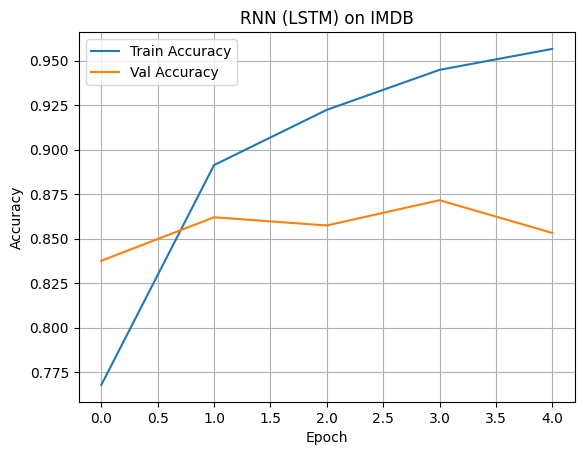

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("RNN (LSTM) on IMDB")
plt.legend()
plt.grid(True)
plt.show()